<a href="https://colab.research.google.com/github/melody016861/melody_Portfolio.github.io/blob/main/109207412_H_ZeroAccess_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Tables

In [ ]:
# get data from github

import requests

url = 'https://github.com/hsiaom26/DS4CS-24/raw/main/data/zeroaccess.zip'

response = requests.get(url)

if response.status_code == 200:
    # Open the file for writing
    with open('zeroaccess.zip', 'wb') as f:
        # Write the response content to the file
        f.write(response.content)
else:
    print('Error: Failed to download the file')


In [ ]:
!unzip zeroaccess.zip

Archive:  zeroaccess.zip
   creating: zeroaccess/
  inflating: zeroaccess/state-internets.csv  
  inflating: zeroaccess/zeroaccess.csv  
  inflating: zeroaccess/county-data.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

z_df = pd.read_csv('zeroaccess/zeroaccess.csv')
s_df = pd.read_csv('zeroaccess/state-internets.csv')
c_df = pd.read_csv('zeroaccess/county-data.csv')

In [ ]:
# the latitude and longitude of the observed ZeroAccess attacks
z_df

,lat,long
0,-10.0000,-55.0000
1,38.0888,-78.5592
2,38.9990,-84.6266
3,48.6210,7.4944
4,43.2342,-86.2484
...,...,...
808441,42.9634,-85.6681
808442,43.2167,-79.7500
808443,43.8833,-79.7333
808444,-33.8833,151.2167


In [ ]:
# some data of US states
s_df

,state,population,internet
0,Alabama,4758191,3092273
1,Arizona,6665093,5230474
2,Arkansas,2919815,1949869
3,California,37350092,29758896
4,Colorado,5077553,4058749
5,Connecticut,3555261,3074229
6,Delaware,894424,719500
7,District of Columbia,605959,463503
8,Florida,18732783,14764418
9,Georgia,9932505,7597608


In [ ]:
# some other info of (sub-)regions in US states
c_df

,subregion,region,pop,income,ipaddr,ufo2010
0,abbeville,south carolina,25101,34670,30330,2
1,acadia,louisiana,61912,37970,38203,6
2,accomack,virginia,33341,41595,41338,2
3,ada,idaho,409061,55304,1035427,59
4,adair,iowa,7481,47623,3762,0
...,...,...,...,...,...,...
3067,yuma,arizona,200022,41441,99991,53
3068,yuma,colorado,10119,44991,7662,1
3069,zapata,texas,14290,26009,3833,0
3070,zavala,texas,11961,23952,545,1


## Plot on a Map

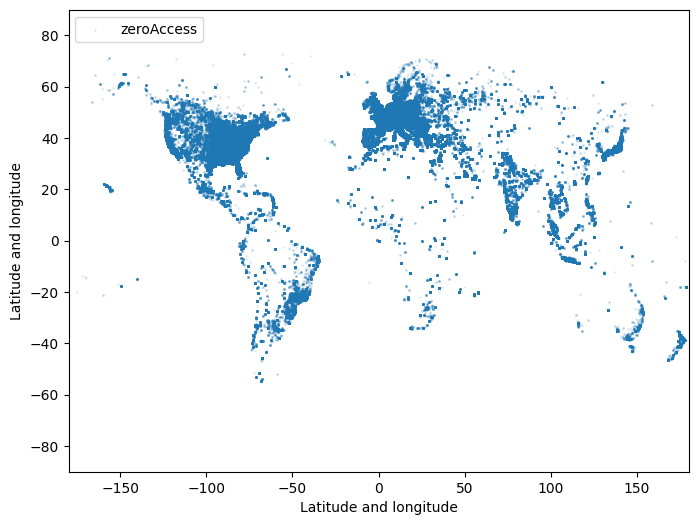

In [ ]:
# plot zeroAccess infection instances on a map
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.scatter(z_df.long, z_df.lat, alpha = 0.1, s = 1, label = "zeroAccess")
ax.set_xlim((-180, 180))
ax.set_ylim((-90, 90))

plt.xlabel("Latitude and longitude")
plt.ylabel("Latitude and longitude")
plt.legend(loc='upper left')

plt.show()

# Q1
**Try to plot US-only data (i.e., show a map with using only US data).** We need a 3rd-party database that can help us to convert the latitude and longitude information in `z_df` to the corresponding nation (and US state).

`reverse_geocoder`'s rearch function can accept a list of (latitude,longitude) and return a list of country informaion.

In [ ]:
!pip install reverse_geocoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for reverse_geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268064 sha256=44248d992adda2cf6be4a17a338b5c0f0e533a3d7748802333a16d9eabdad4db
  Stored in directory: /root/.cache/pip/wheels/bd/e5/88/eb139b6d6a26b8022d370ab991f7a836802fed9871975ec6d9
Successfully built reverse_geocoder


In [ ]:
# reverse_geocoder example
# given a list of (latitude,longitude),
# a list of information (in python dictionary format) will be returned.
# we need 'cc' (country code) and 'admin1' (region) for later analysis

import reverse_geocoder
reverse_geocoder.search([(-10, -55), (38.0888, -78.5592)])


Loading formatted geocoded file...


[{'lat': '-9.87556',
  'lon': '-56.08611',
  'name': 'Alta Floresta',
  'admin1': 'Mato Grosso',
  'admin2': 'Alta Floresta',
  'cc': 'BR'},
 {'lat': '38.02931',
  'lon': '-78.47668',
  'name': 'Charlottesville',
  'admin1': 'Virginia',
  'admin2': 'City of Charlottesville',
  'cc': 'US'}]

In [ ]:
import reverse_geocoder

def get_country_and_state_batch(df_of_lat_lng):
    """
    Get the country info from a dataframe containing (latitude, longitude).

    Returns:
        A dataFrame with info from reverse_geocoder
    """

    # Get results from reverse_geocoder
    list_of_lat_lng = list(zip(df_of_lat_lng.lat, df_of_lat_lng.long))
    result_dict_li = reverse_geocoder.search(list_of_lat_lng)
    return pd.DataFrame(result_dict_li).drop(["lat", "lon"], axis = 1)


In [ ]:
z_df.head(10) # example

,lat,long
0,-10.0000,-55.0000
1,38.0888,-78.5592
2,38.9990,-84.6266
3,48.6210,7.4944
4,43.2342,-86.2484
5,47.0000,20.0000
6,44.8012,-68.7778
7,51.3333,1.4333
8,36.0580,-88.8253
9,20.6000,-100.3833


In [ ]:
_df = get_country_and_state_batch(z_df.head(10)) # this example hass only 10 rows
_df

,name,admin1,admin2,cc
0,Alta Floresta,Mato Grosso,Alta Floresta,BR
1,Charlottesville,Virginia,City of Charlottesville,US
2,Florence,Kentucky,Boone County,US
3,Marlenheim,Alsace,Departement du Bas-Rhin,FR
4,Muskegon,Michigan,Muskegon County,US
5,Kocser,Pest,,HU
6,Bangor,Maine,Penobscot County,US
7,Ramsgate,England,Kent,GB
8,Bradford,Tennessee,Gibson County,US
9,Santiago de Queretaro,Queretaro,Queretaro,MX


In [ ]:
# merge latitude, longitude and contry info together
df = z_df.merge(_df, left_index = True, right_index = True)
df

,lat,long,name,admin1,admin2,cc
0,-10.0000,-55.0000,Alta Floresta,Mato Grosso,Alta Floresta,BR
1,38.0888,-78.5592,Charlottesville,Virginia,City of Charlottesville,US
2,38.9990,-84.6266,Florence,Kentucky,Boone County,US
3,48.6210,7.4944,Marlenheim,Alsace,Departement du Bas-Rhin,FR
4,43.2342,-86.2484,Muskegon,Michigan,Muskegon County,US
5,47.0000,20.0000,Kocser,Pest,,HU
6,44.8012,-68.7778,Bangor,Maine,Penobscot County,US
7,51.3333,1.4333,Ramsgate,England,Kent,GB
8,36.0580,-88.8253,Bradford,Tennessee,Gibson County,US
9,20.6000,-100.3833,Santiago de Queretaro,Queretaro,Queretaro,MX


Modify the above example, and only include US data in entire z_df (note that the example shown above only has 10 rows). Lets assume the the dataframe is z_us_df.

In [ ]:
_df = get_country_and_state_batch(z_df) # this example hass only 10 rows

# merge latitude, longitude and contry info together
df = z_df.merge(_df, left_index = True, right_index = True)

z_us_df = df[df['cc'] == 'US']
print(z_us_df)

            lat     long             name         admin1  \
1       38.0888 -78.5592  Charlottesville       Virginia   
2       38.9990 -84.6266         Florence       Kentucky   
4       43.2342 -86.2484         Muskegon       Michigan   
6       44.8012 -68.7778           Bangor          Maine   
8       36.0580 -88.8253         Bradford      Tennessee   
...         ...      ...              ...            ...   
808436  42.7495 -73.5951      Poestenkill       New York   
808437  33.7490 -84.3880          Atlanta        Georgia   
808438  43.7173 -71.7163         Plymouth  New Hampshire   
808441  42.9634 -85.6681     Grand Rapids       Michigan   
808445  40.5982 -83.1425           Marion           Ohio   

                         admin2  cc  
1       City of Charlottesville  US  
2                  Boone County  US  
4               Muskegon County  US  
6              Penobscot County  US  
8                 Gibson County  US  
...                         ...  ..  
808436       

Now you can plot the US-only map below.

In [ ]:
import folium
from folium.plugins import MarkerCluster

# 初始化地圖中心為美國
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# 初始化 MarkerCluster
marker_cluster = MarkerCluster().add_to(us_map)

# 在地圖上標記 ZeroAccess 感染實例
for idx, row in z_us_df.iterrows():
    folium.Marker([row['lat'], row['long']], popup=row['name']).add_to(marker_cluster)

# 顯示地圖
us_map


KeyboardInterrupt: 

# Q2
**Aggregate the number of ZeroAccess attakcs per state (the state name is in 'admin1' column).**

Hint: try `value_counts()` function of dataframe, and you can `rename()` a column name for better representation. An example data table is shown, try to output a dataframe as shown below.

In [ ]:
# 聚合每個州的 ZeroAccess 攻擊數量並排序
z_state_df = z_us_df['admin1'].value_counts().reset_index()
z_state_df.columns = ['admin1', 'ZeroAccess']
z_state_df = z_state_df.sort_values(by='ZeroAccess', ascending=False)

# 將 'Washington, D.C.' 重命名為 'Washington_DC'，以符合輸出要求
z_state_df = z_state_df.replace({'admin1': {'Washington, D.C.': 'Washington_DC'}})

# 將索引名稱設置為 None，以消除索引名稱
z_state_df.index.name = None

# 輸出結果
print(z_state_df)


            admin1  ZeroAccess
0       California       28162
1            Texas       22746
2          Florida       17414
3         New York       16207
4           Kansas       15241
5     Pennsylvania       11020
6             Ohio       10832
7          Georgia       10386
8         Illinois       10312
9   North Carolina        8989
10        Michigan        8362
11      New Jersey        8066
12         Arizona        5928
13        Virginia        5753
14      Washington        5631
15   Massachusetts        5597
16        Missouri        5561
17         Indiana        5418
18       Tennessee        5248
19        Maryland        5195
20       Wisconsin        4965
21         Alabama        4779
22        Kentucky        4504
23       Minnesota        4470
24  South Carolina        4460
25        Colorado        4413
26       Louisiana        4372
27        Oklahoma        3225
28     Connecticut        2924
29        Arkansas        2738
30          Oregon        2686
31     M

# Q3
**Show the ZeroAccess info per city/county in a state. Which city/county suffers from the ZeroAccess attack the most? (You should output a data table and sort it by the number of attacks, and point out which county has highest attack?)**

Note that the city/county name is in 'admin2' column, and some city name may exist in differnt state (so that you cannot simply count the number of attacks by `admin2.value_counts()`)

Hint: try `groupby()`, `count()` functions on a dataframe.

In [ ]:
# 使用 groupby 函數對 admin1 和 admin2 進行分組，然後計算每個分組中的數量
zeroaccess_per_city_county = z_us_df.groupby(['admin1', 'admin2']).size().reset_index(name='cc')

# 將結果按照 ZeroAccess 降序排序
zeroaccess_per_city_county = zeroaccess_per_city_county.sort_values(by='cc', ascending=False)

# 輸出結果
print(zeroaccess_per_city_county)


            admin1               admin2     cc
899         Kansas        Marion County  12655
188     California   Los Angeles County   8031
2479         Texas        Harris County   4591
570       Illinois          Cook County   4414
92         Arizona      Maricopa County   4228
...            ...                  ...    ...
1892  North Dakota      Billings County      1
502        Georgia       Wheeler County      1
490        Georgia         Towns County      1
2588         Texas  Throckmorton County      1
2417         Texas          Camp County      1

[2969 rows x 3 columns]


# Q4
**Does the attack occurance in each state relate to state population or the number of internet users? Using a bar char to demonstrate it!**

Hint: you need to first aggrgate 'population' and 'internet' info in `s_df` to `z_state_df`. The dataframe row index should be the state name. And then, you plot 'population', 'internet' and 'ZeroAccess' data in a bar chart as shown below.

In [ ]:
pop_state_df = s_df.copy()
pop_state_df.state = pop_state_df.state.apply(lambda x: 'Washington, D.C.' if x == 'District of Columbia' else x) # District of Columbia -> Washington, D.C.
pop_state_df = pop_state_df.set_index('state')
pop_state_df

,population,internet
state,,
Alabama,4758191,3092273
Arizona,6665093,5230474
Arkansas,2919815,1949869
California,37350092,29758896
Colorado,5077553,4058749
Connecticut,3555261,3074229
Delaware,894424,719500
"Washington, D.C.",605959,463503
Florida,18732783,14764418


In [ ]:
# another way to concate two dataframes
# note that some information is missing!
# try dropna() to remove rows with missing value

compare_df = pd.concat([z_state_df, pop_state_df], join="outer", sort=False, axis=1)
compare_df

,admin1,ZeroAccess,population,internet
0,California,28162.0,NaN,NaN
1,Texas,22746.0,NaN,NaN
2,Florida,17414.0,NaN,NaN
3,New York,16207.0,NaN,NaN
4,Kansas,15241.0,NaN,NaN
...,...,...,...,...
Virginia,NaN,NaN,7965428.0,6193567.0
Washington,NaN,NaN,6734229.0,5772919.0
West Virginia,NaN,NaN,1838901.0,1296905.0
Wisconsin,NaN,NaN,5714200.0,4744417.0


In [ ]:
# 合併兩個DataFrame，使用州名作為索引，并且使用外連接，確保所有州都包含在结果中
compare_df = pd.concat([z_state_df.set_index('admin1'), pop_state_df], join="outer", axis=1)

# 輸出合併後的结果
print(compare_df)


                  ZeroAccess  population    internet
California           28162.0  37350092.0  29758896.0
Texas                22746.0  25042738.0  17176661.0
Florida              17414.0  18732783.0  14764418.0
New York             16207.0  19746813.0  16091772.0
Kansas               15241.0   2848369.0   2248721.0
Pennsylvania         11020.0  12737230.0   9909482.0
Ohio                 10832.0  11663946.0   8949773.0
Georgia              10386.0   9932505.0   7597608.0
Illinois             10312.0  13046084.0  10243294.0
North Carolina        8989.0   9479467.0   6809315.0
Michigan              8362.0  10074498.0   7899843.0
New Jersey            8066.0   8799248.0   7728426.0
Arizona               5928.0   6665093.0   5230474.0
Virginia              5753.0   7965428.0   6193567.0
Washington            5631.0   6734229.0   5772919.0
Massachusetts         5597.0   6662878.0   5745853.0
Missouri              5561.0   6050503.0   4380156.0
Indiana               5418.0   6490613.0   477

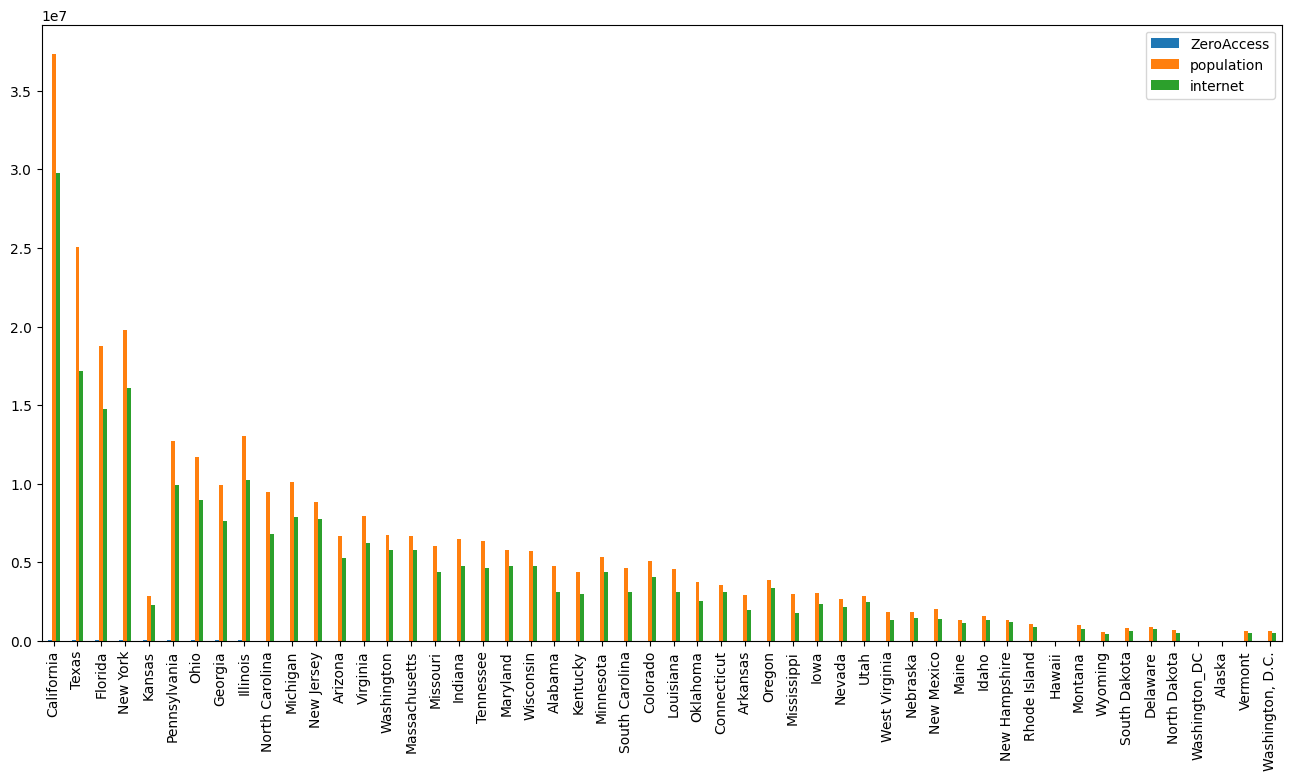

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 合併兩個 DataFrame，使用州名作為索引，並使用外連接，確保所有州都包含在結果中
compare_df = pd.concat([z_state_df.set_index('admin1'), pop_state_df], axis=1)

# 添加 'internet' 列到 compare_df
compare_df['internet'] = pop_state_df['internet']

# 根據 'ZeroAccess' 的數字進行排序
compare_df = compare_df.sort_values(by='ZeroAccess', ascending=False)

# 繪製條形圖
compare_df[["ZeroAccess", "population", "internet"]].plot.bar(rot=0, figsize=(16, 8))
plt.xticks(rotation=90)
plt.show()


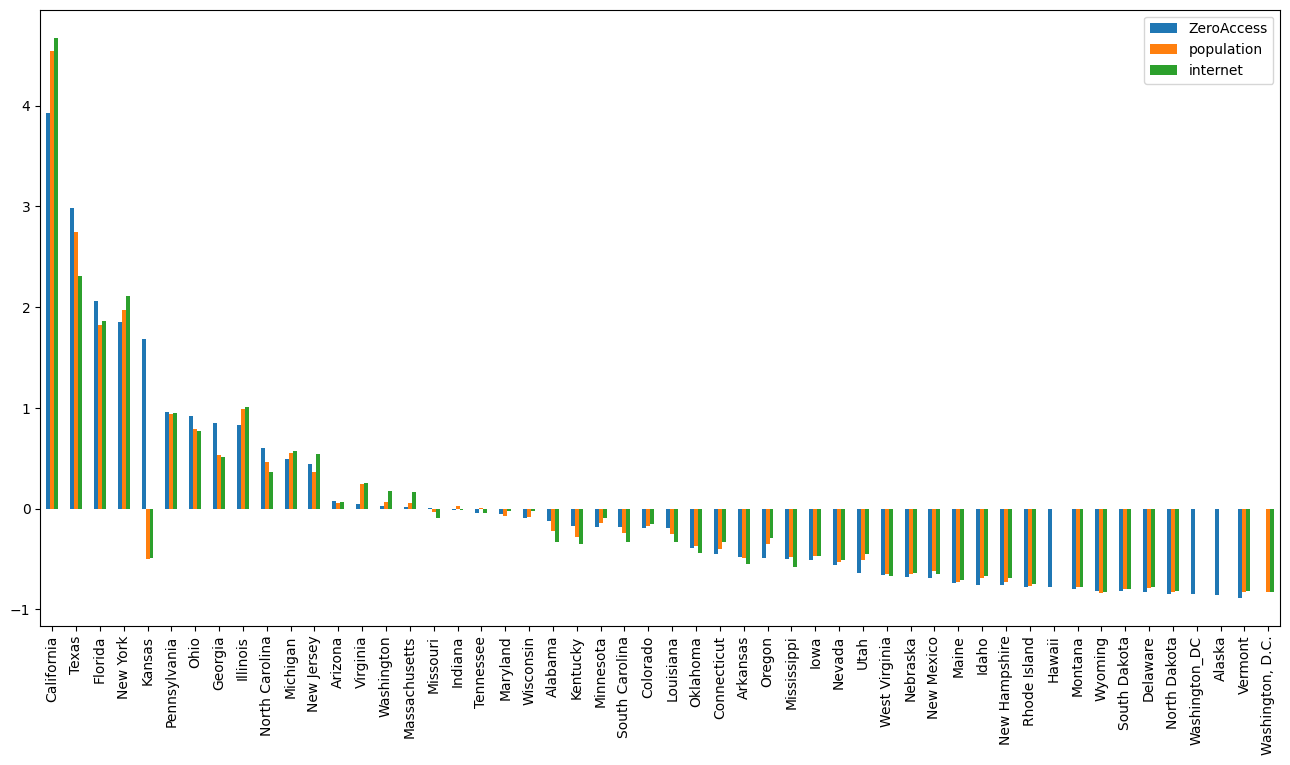

In [ ]:
from sklearn.preprocessing import StandardScaler

# 初始化StandardScaler對象
scaler = StandardScaler()

# 對compare_df中的每一列進行標準化
compare_df_normalized = compare_df.copy()  # 创建副本以保留原始数据
compare_df_normalized[["ZeroAccess", "population", "internet"]] = scaler.fit_transform(compare_df_normalized[["ZeroAccess", "population", "internet"]])

# 打印標準化後的DataFrame
#print(compare_df_normalized)

# 繪製標準化後的數據的長條圖
compare_df_normalized[["ZeroAccess", "population", "internet"]].plot.bar(rot=0, figsize=(16, 8))
plt.xticks(rotation=90)
plt.show()


# Q5
**What is the problem of the above figure? Which state has more ZeroAccess attacks w.r.t its population? Can you explain why?**

Hint: it is an open quesion.

上圖的問題 : 長條圖代表每個州的ZeroAccess攻擊、人口和網路使用者的絕對數量，而不考慮相對比例。因此，直接比較不同州的ZeroAccess攻擊是不太精準地方式。
因此，為了確定哪個州相對於其人口有更多的ZeroAccess攻擊，我們需要透過計算每個州的ZeroAccess攻擊與人口的比率來標準化資料。如此一來我們就可以透過識別比率最高的州，來猜測ZeroAccess攻擊的可能性更大。
不過一旦資料標準化後，儘管Califonia的ZeroAccess攻擊絕對數量最高，但其人口中ZeroAccess攻擊的比例不一定最高。比率最高的州表示相對於其人口規模而言，ZeroAccess攻擊的影響更大。
California 的ZeroAccess攻擊絕對數量最高的原因有以下 :


1.   人口密度：加州是美國人口最多的州，擁有大量網路使用者。其龐大的人口規模為網路攻擊（包括零訪問攻擊）提供了更大的潛在目標。
2.   經濟重要性、技術中心：加州是許多大型企業、科技公司和金融機構的所在地。由於潛在的經濟利益或破壞，這些實體可能成為網路犯罪分子有吸引力的目標。
3. 網路基礎設施：加州擁有強大的網路基礎設施，包括高速網路和廣泛的網路連線。該基礎設施為網路犯罪分子提供了更多發動 ZeroAccess 攻擊的機會。



# Q6
Combine another dataset `c_df` by 'state'.

In [ ]:
c_df

,subregion,region,pop,income,ipaddr,ufo2010
0,abbeville,south carolina,25101,34670,30330,2
1,acadia,louisiana,61912,37970,38203,6
2,accomack,virginia,33341,41595,41338,2
3,ada,idaho,409061,55304,1035427,59
4,adair,iowa,7481,47623,3762,0
...,...,...,...,...,...,...
3067,yuma,arizona,200022,41441,99991,53
3068,yuma,colorado,10119,44991,7662,1
3069,zapata,texas,14290,26009,3833,0
3070,zavala,texas,11961,23952,545,1


In [ ]:
feature_df = c_df.drop(['subregion'], axis=1).groupby(by='region').sum()

feature_df

,pop,income,ipaddr,ufo2010
region,,,,
alabama,4822023,2522962,22542601,250
arizona,6532974,612727,62062174,1250
arkansas,2949131,2677866,4810526,265
california,38041430,3241756,156511903,3769
colorado,5129284,3206281,22787577,513
connecticut,3590347,565060,40993589,280
delaware,917092,172156,19378182,74
district of columbia,632323,61835,10759507,1
florida,19317568,2990011,23716071,1465


In [ ]:
# copy data and change state to lowercase
# because the state name in feature_df is lowercase
compare_lower_df = compare_df.copy()
compare_lower_df = compare_lower_df.reset_index().rename(columns={"index":"state"})
compare_lower_df.state = compare_lower_df.state.apply(lambda s: s.lower() if s != "Washington, D.C." else "district of columbia")
compare_lower_df = compare_lower_df.set_index('state')
compare_lower_df

,ZeroAccess,population,internet
state,,,
california,28162.0,37350092.0,29758896.0
texas,22746.0,25042738.0,17176661.0
florida,17414.0,18732783.0,14764418.0
new york,16207.0,19746813.0,16091772.0
kansas,15241.0,2848369.0,2248721.0
pennsylvania,11020.0,12737230.0,9909482.0
ohio,10832.0,11663946.0,8949773.0
georgia,10386.0,9932505.0,7597608.0
illinois,10312.0,13046084.0,10243294.0


In [ ]:
# Concatenate the two dataframes using outer join
feature_df = pd.concat([feature_df, compare_lower_df], join="outer", sort=False, axis=1)

# Drop rows with missing values
feature_df = feature_df.dropna()

# Remove duplicate columns
feature_df = feature_df.loc[:, ~feature_df.columns.duplicated()]

# Remove the 'population' column
population_column = feature_df.pop('population')
feature_df.insert(len(feature_df.columns)-1, 'population', population_column)

# Convert 'ZeroAccess' column to integer type
feature_df['ZeroAccess'] = feature_df['ZeroAccess'].astype(int)

# 移除'pop'列
feature_df = feature_df.drop('pop', axis=1)

# Print the final feature dataframe
print(feature_df)


                    income       ipaddr  ufo2010  ZeroAccess  population  \
alabama          2522962.0   22542601.0    250.0        4779   4758191.0   
arizona           612727.0   62062174.0   1250.0        5928   6665093.0   
arkansas         2677866.0    4810526.0    265.0        2738   2919815.0   
california       3241756.0  156511903.0   3769.0       28162  37350092.0   
colorado         3206281.0   22787577.0    513.0        4413   5077553.0   
connecticut       565060.0   40993589.0    280.0        2924   3555261.0   
delaware          172156.0   19378182.0     74.0         740    894424.0   
florida          2990011.0   23716071.0   1465.0       17414  18732783.0   
georgia          6433814.0   20947043.0    548.0       10386   9932505.0   
idaho            1904783.0    2148449.0    161.0        1147   1562046.0   
illinois         4926504.0   29586316.0   1027.0       10312  13046084.0   
indiana          4395705.0   16889196.0    654.0        5418   6490613.0   
iowa        

#Q7
Now we can **perform linear regression, and explain the results.**

Set $X$ be `["population", "income", "ipaddr", "ufo2010", "internet"]`, let $y$
 be `ZeroAccess`.

In [ ]:
X_train = feature_df[["population", "income", "ipaddr", "ufo2010", 'internet']]
y_train = feature_df['ZeroAccess']

In [ ]:
from sklearn.linear_model import LinearRegression
linearRegModel = LinearRegression()
linearRegModel.fit(X_train, y_train)

print("Intercept is ", linearRegModel.intercept_)
print("coefficients  is ", linearRegModel.coef_)

Intercept is  -238.9968956758048
coefficients  is  [ 4.54386899e-04  4.58677572e-04  4.40458254e-07 -2.62695489e-01
  3.88878291e-04]


In [ ]:
# print with feature name
print()
print("ZeroAccess = ")
for c,f in zip(linearRegModel.coef_, X_train.columns):
  print(' {0:+} * {1}'.format(c, f))
print("", linearRegModel.intercept_)


ZeroAccess = 
 +0.00045438689930802365 * population
 +0.0004586775720141363 * income
 +4.404582538270179e-07 * ipaddr
 -0.2626954886041928 * ufo2010
 +0.0003888782905238274 * internet
 -238.9968956758048


#Q8

Now we can **perform linear regression with StandardScaler, and explain the results.**

In [ ]:

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
nolinearRegModel = LinearRegression()
nolinearRegModel.fit(scaled_X_train, y_train)

print("Intercept is ", nolinearRegModel.intercept_)
print("coefficients  is ", nolinearRegModel.coef_)

print()
print("ZeroAccess = ")
for c,f in zip(nolinearRegModel.coef_, X_train.columns):
  print(' {0:+} * {1}'.format(c, f))
print("", nolinearRegModel.intercept_)

Intercept is  5799.083333333333
coefficients  is  [3118.31843189  892.86831512   18.28434384 -157.45292548 2078.23046289]

ZeroAccess = 
 +3118.3184318927415 * population
 +892.8683151208113 * income
 +18.28434383971296 * ipaddr
 -157.452925483919 * ufo2010
 +2078.230462886828 * internet
 5799.083333333333
